In [113]:
import pandas as pd
import numpy as np

In [114]:
android = pd.read_csv("../../3-DataMerge/2-SeparetedFramework/android.csv", index_col=[0,1])
aws = pd.read_csv("../../3-DataMerge/2-SeparetedFramework/aws.csv", index_col=[0,1])
azure = pd.read_csv("../../3-DataMerge/2-SeparetedFramework/azure.csv", index_col=[0,1])
spring = pd.read_csv("../../3-DataMerge/2-SeparetedFramework/spring.csv", index_col=[0,1])

In [115]:
def setTime(df):
    time = pd.DataFrame(df.index.values.tolist(), columns=['year','month'])
    time["day"] = 1
    df.set_index(pd.to_datetime(time), inplace=True)

In [116]:
setTime(android)
setTime(aws)
setTime(azure)
setTime(spring)

In [124]:
def normalize(data):
    return (data-data.min())/(data.max()-data.min())

In [126]:
allMetricsAndQuestions = [android, aws, azure, spring]

In [127]:
allMetricsAndQuestions = [normalize(framework) for framework in allMetricsAndQuestions]

Plotting only metrics

In [128]:
def plot(data, title, metric, ylabel, xlabel):
    metrics = [metrics[metric] for metrics in allMetricsAndQuestions]
    
    metrics[0] = metrics[0].rename("Android")
    metrics[1] = metrics[1].rename("AWS")
    metrics[2] = metrics[2].rename("Azure")
    metrics[3] = metrics[3].rename("Spring")
    
    
    subplots = [metric.plot(figsize=(15,5), fontsize=20, legend=True) for metric in metrics]
    subplot = subplots[-1]
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

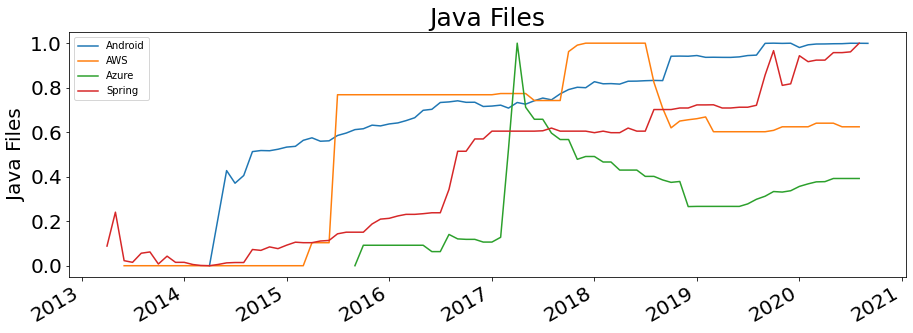

In [129]:
plot(allMetricsAndQuestions, "Java Files", "numberJavaFiles", "Java Files", "")

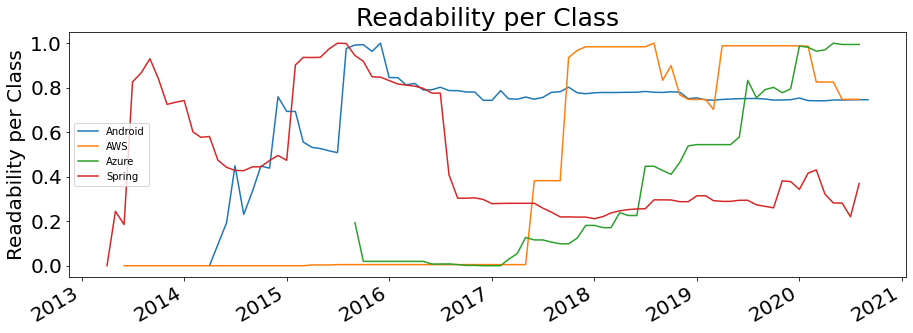

In [131]:
plot(allMetricsAndQuestions, "Readability per Class", "readability",  "Readability per Class", "")

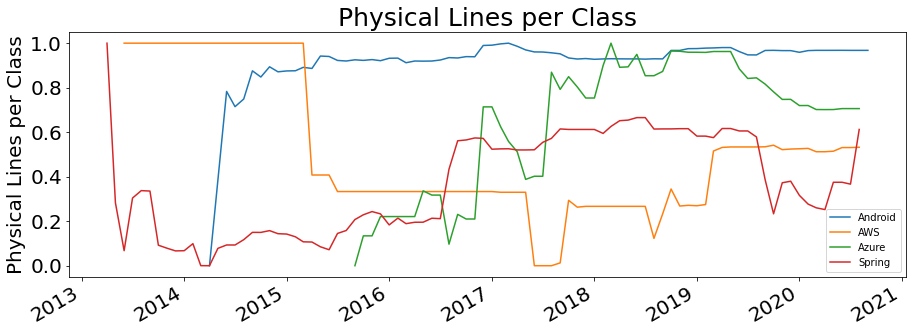

In [134]:
plot(allMetricsAndQuestions, "Physical Lines per Class", "CountLine", "Physical Lines per Class", "")

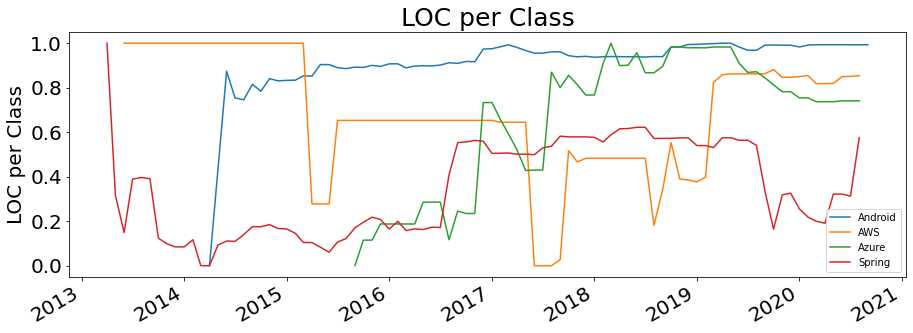

In [137]:
plot(allMetricsAndQuestions, "LOC per Class", "CountLineCode", "LOC per Class", "")

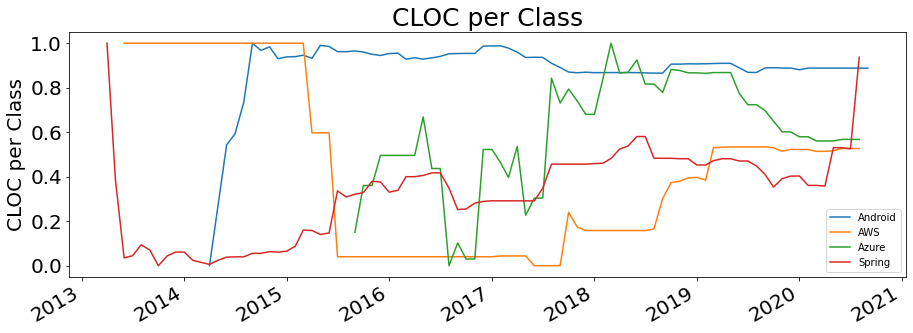

In [138]:
plot(allMetricsAndQuestions, "CLOC per Class", "CountLineComment", "CLOC per Class", "")

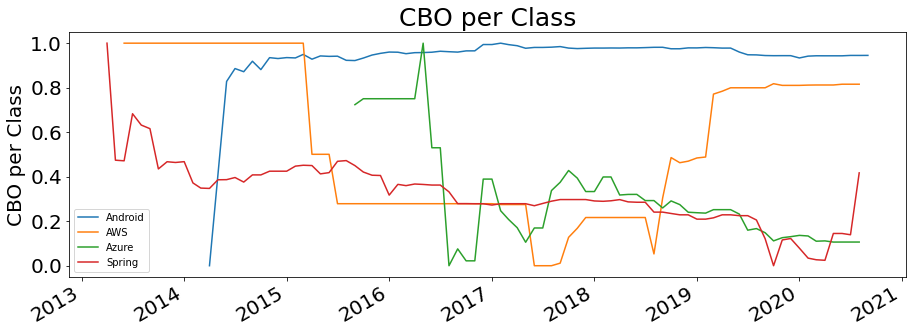

In [139]:
plot(allMetricsAndQuestions, "CBO per Class", "CountClassCoupled", "CBO per Class", "")

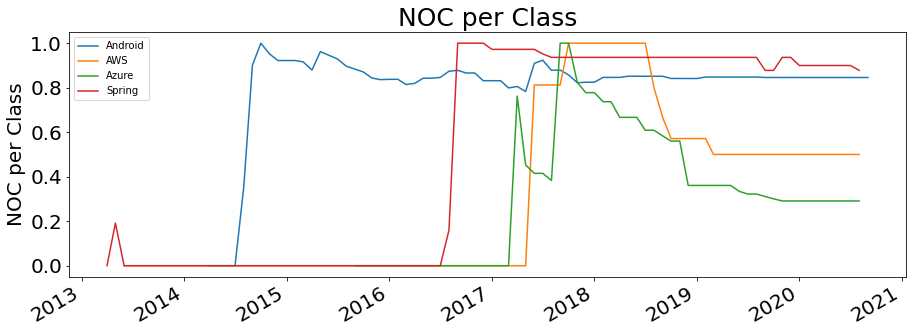

In [140]:
plot(allMetricsAndQuestions, "NOC per Class", "CountClassDerived", "NOC per Class", "")

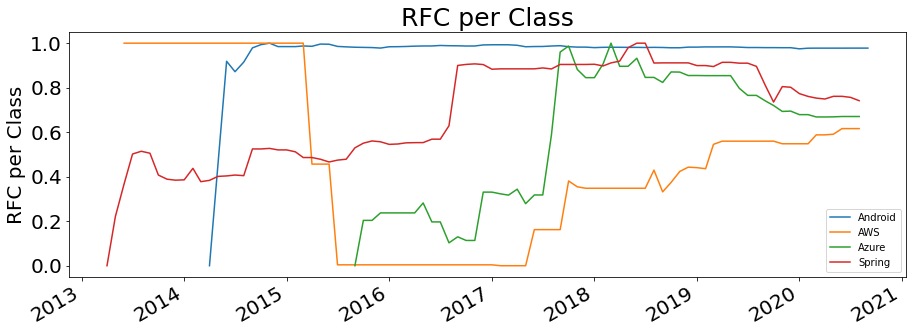

In [142]:
plot(allMetricsAndQuestions, "RFC per Class", "CountDeclMethodAll", "RFC per Class", "")

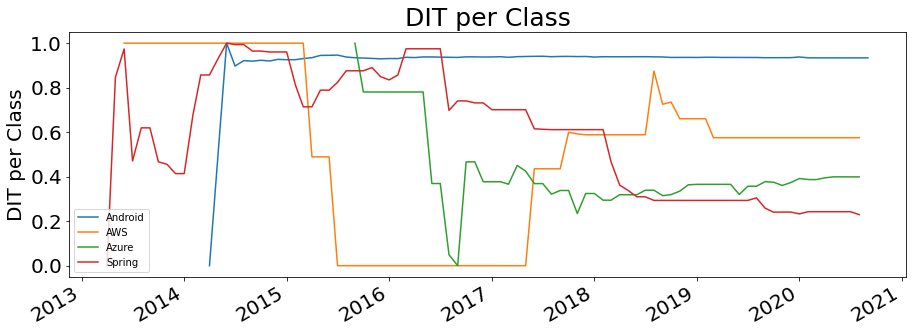

In [143]:
plot(allMetricsAndQuestions, "DIT per Class", "MaxInheritanceTree", "DIT per Class", "")

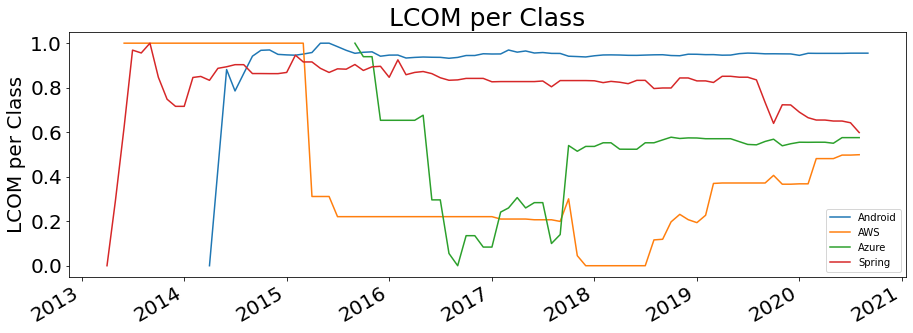

In [144]:
plot(allMetricsAndQuestions, "LCOM per Class", "PercentLackOfCohesion", "LCOM per Class", "")

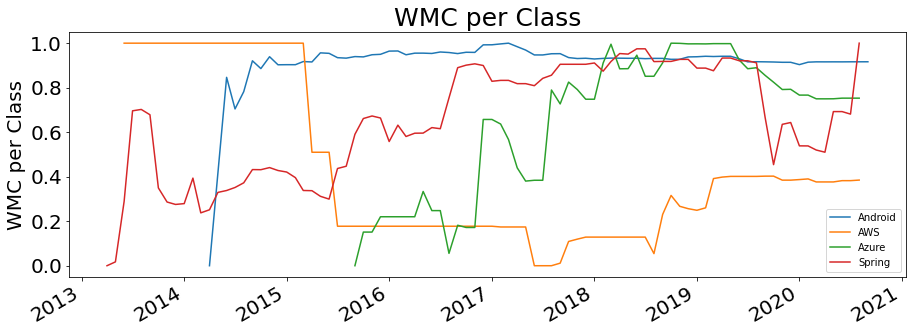

In [145]:
plot(allMetricsAndQuestions, "WMC per Class", "SumCyclomatic", "WMC per Class", "")

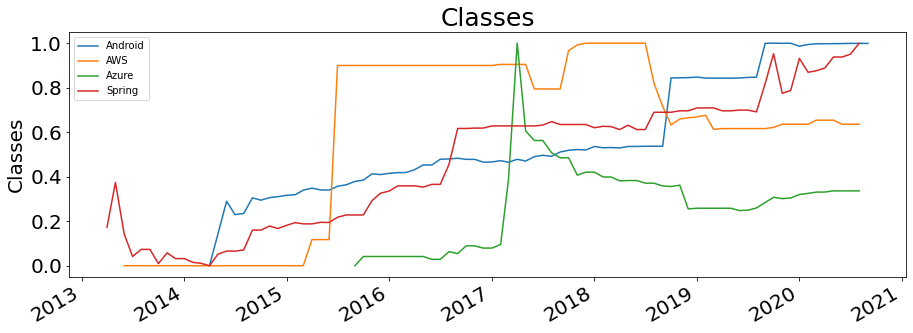

In [146]:
plot(allMetricsAndQuestions, "Classes", "CountDeclClass", "Classes", "")

Plotting metrics and questions

In [19]:
allMetricsAndQuestions["Java"] = allMetricsAndQuestions["numberJavaFiles"]
allMetricsAndQuestions["Readability"] = allMetricsAndQuestions["readability"]
allMetricsAndQuestions["PL"] = allMetricsAndQuestions["CountLine"]
allMetricsAndQuestions["LOC"] = allMetricsAndQuestions["CountLineCode"]
allMetricsAndQuestions["CLOC"] = allMetricsAndQuestions["CountLineComment"]
allMetricsAndQuestions["CBO"] = allMetricsAndQuestions["CountClassCoupled"]
allMetricsAndQuestions["NOC"] = allMetricsAndQuestions["CountClassDerived"]
allMetricsAndQuestions["RFC"] = allMetricsAndQuestions["CountDeclMethodAll"]
allMetricsAndQuestions["DIT"] = allMetricsAndQuestions["MaxInheritanceTree"]
allMetricsAndQuestions["LCOM"] = allMetricsAndQuestions["PercentLackOfCohesion"]
allMetricsAndQuestions["WMC"] = allMetricsAndQuestions["SumCyclomatic"]
allMetricsAndQuestions["Classes"] = allMetricsAndQuestions["CountDeclClass"]
allMetricsAndQuestions["Questions"] = allMetricsAndQuestions["questions"]

In [20]:
def plot(metrics, questions, metric, title, ylabel, xlabel):
    subplot = metrics.plot(figsize=(15,5), fontsize=20, legend=True, label=metric)
    subplot = questions.plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

In [21]:
def plot(dataframe, metric, title, ylabel):
    plot = dataframe.plot(kind="line", y=[metric, "questions"], subplots=False, figsize=(15,5), fontsize=20, legend=True, secondary_y="questions")    
    plot.set_title(title, fontsize=25)
    plot.set_ylabel(ylabel, fontsize=20)
    plot.set_xlabel("Year", fontsize=20)
    plot.figure.savefig(metric+".jpg",bbox_inches = 'tight') 

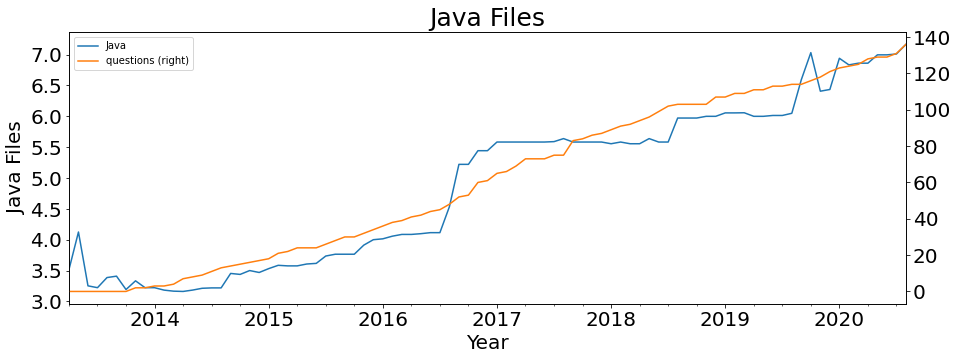

In [22]:
plot(allMetricsAndQuestions, "Java", "Java Files", "Java Files")

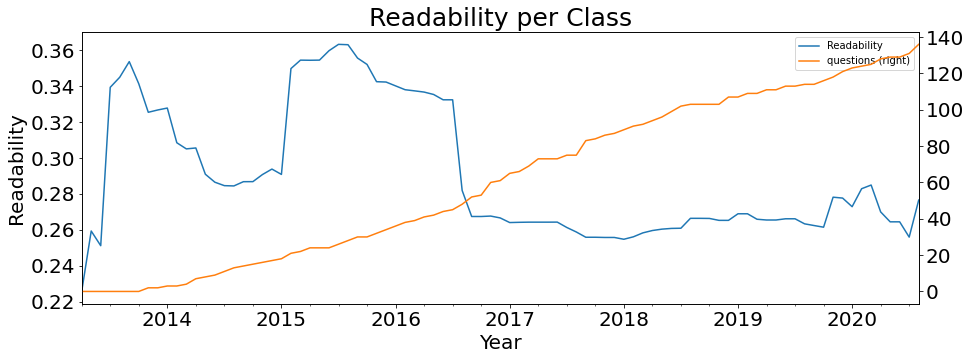

In [23]:
plot(allMetricsAndQuestions, "Readability", "Readability per Class", "Readability")

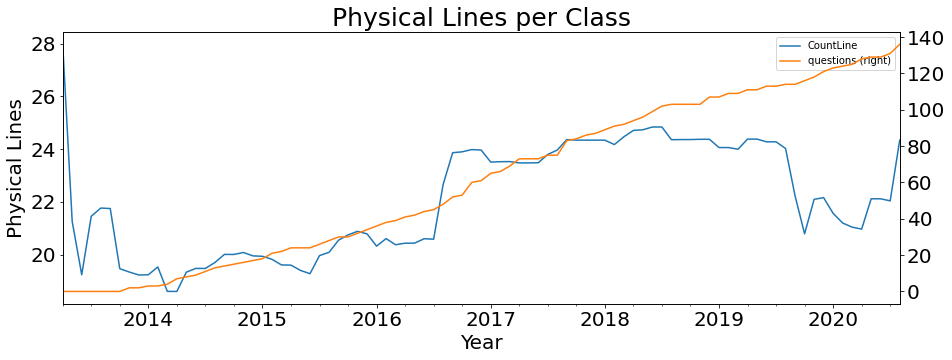

In [24]:
plot(allMetricsAndQuestions, "CountLine", "Physical Lines per Class", "Physical Lines")

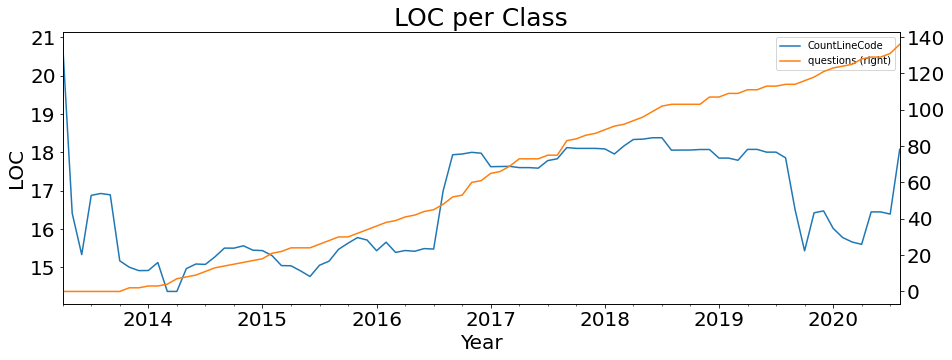

In [25]:
plot(allMetricsAndQuestions, "CountLineCode", "LOC per Class", "LOC")

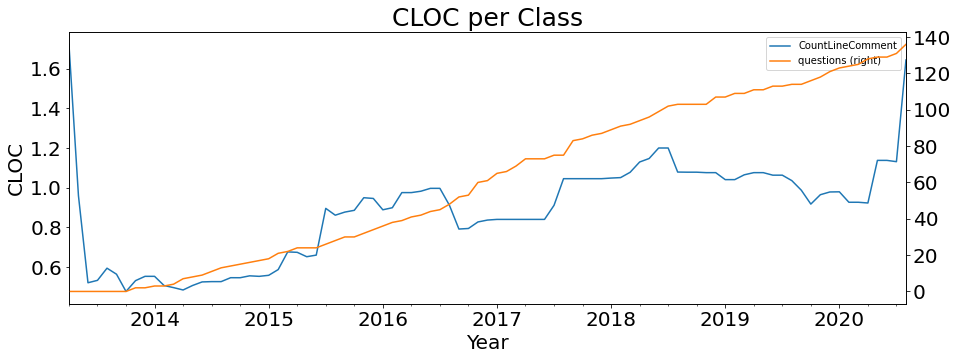

In [26]:
plot(allMetricsAndQuestions, "CountLineComment", "CLOC per Class", "CLOC")

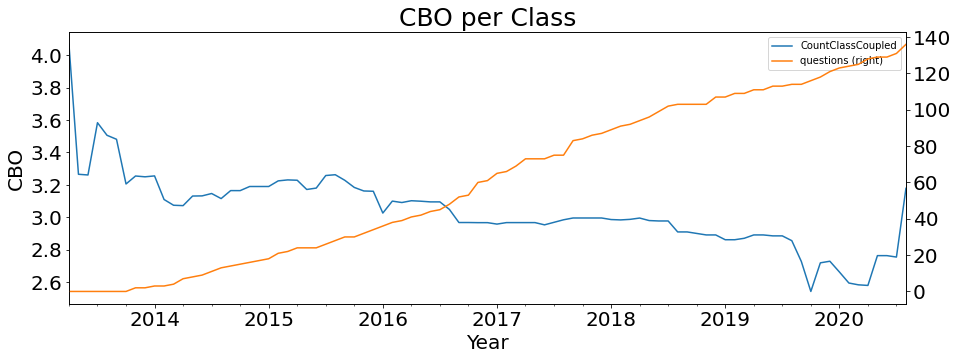

In [27]:
plot(allMetricsAndQuestions, "CountClassCoupled", "CBO per Class", "CBO")

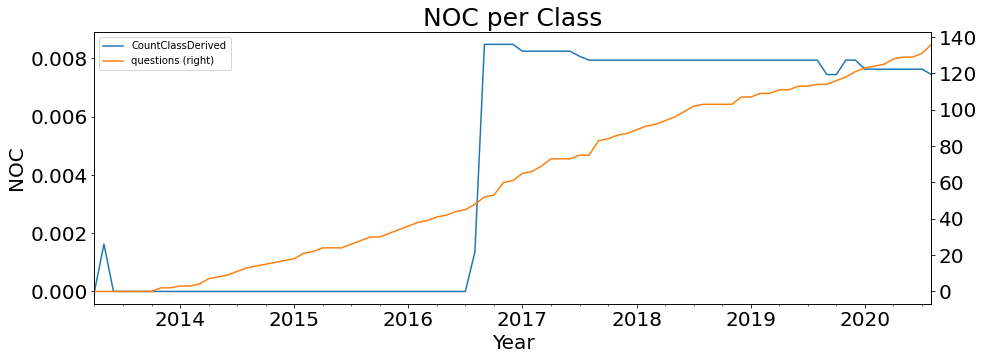

In [28]:
plot(allMetricsAndQuestions, "CountClassDerived", "NOC per Class", "NOC")

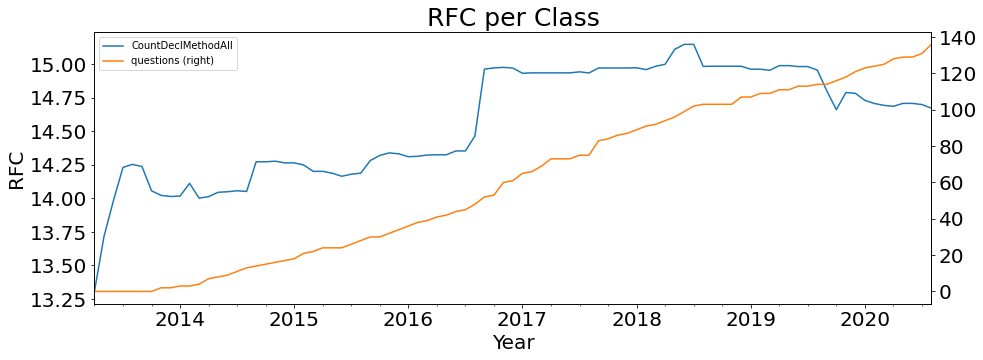

In [29]:
plot(allMetricsAndQuestions, "CountDeclMethodAll", "RFC per Class", "RFC")

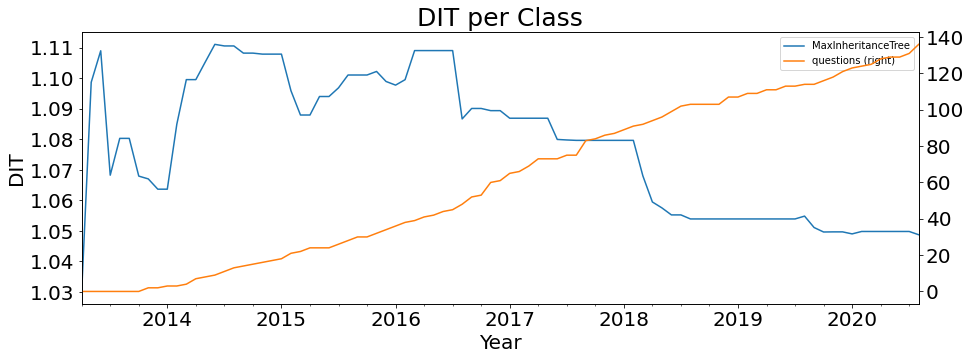

In [30]:
plot(allMetricsAndQuestions, "MaxInheritanceTree", "DIT per Class", "DIT")

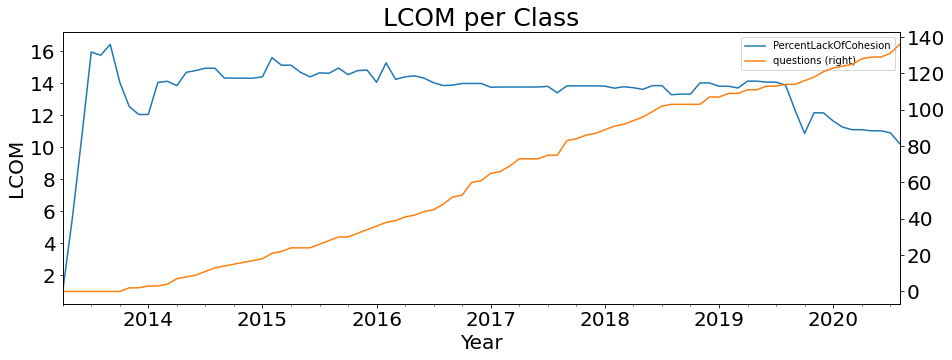

In [31]:
plot(allMetricsAndQuestions, "PercentLackOfCohesion", "LCOM per Class", "LCOM")

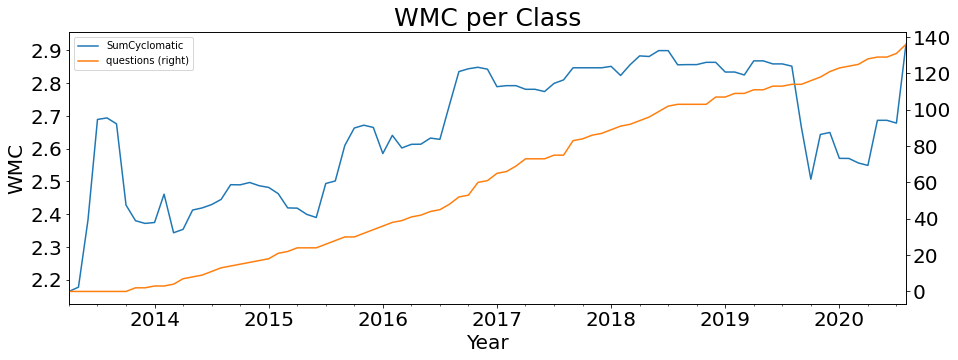

In [32]:
plot(allMetricsAndQuestions, "SumCyclomatic", "WMC per Class", "WMC")

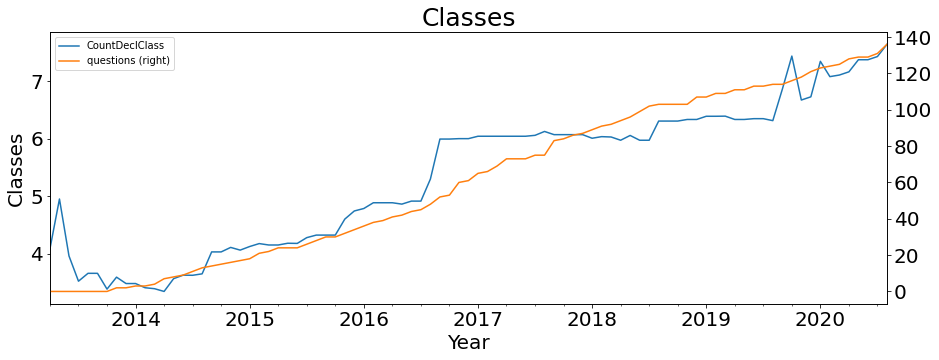

In [33]:
plot(allMetricsAndQuestions, "CountDeclClass", "Classes", "Classes")